In [218]:
import pandas as pd
import matplotlib.pyplot as plt

In [219]:
# ops_area_polygon is pasted straight from 
#  the SMODE Pilot Experimental Plan (page 7)
colnames = ['lat_deg','lat_min','lon_deg','lon_min']
df = pd.read_csv('tools/ops_area_polygon.csv',sep=',',
                 names=colnames,header=0)

In [220]:
df

,lat_deg,lat_min,lon_deg,lon_min
0,38,0.5,-125,-22.067
1,37,43.0,-124,-0.067
2,37,45.0,-123,-26.000
3,36,58.0,-122,-57.000
4,36,20.0,-124,-19.067


In [221]:
# append last first row to close the polygon
df = df.append(df.iloc[0],ignore_index=True)

In [222]:
lat = df.lat_deg + df.lat_min/60
lon = df.lon_deg + df.lon_min/60

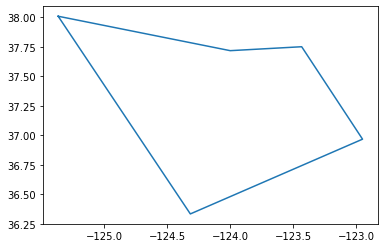

In [223]:
plt.plot(lon,lat)

In [224]:
df_polygon = pd.DataFrame([lon,lat])

In [225]:
df_polygon = pd.concat([lon, lat], axis=1).\
                          rename(columns={0: 'longitude', 
                                          1: 'latitude'}
                    )

In [226]:
df_polygon.to_json('ops_area_polygon.json',
                   orient='split',
                   index=False
)

In [227]:
!cat ops_area_polygon.json

{"columns":["longitude","latitude"],"data":[[-125.3677833333,38.0083333333],[-124.0011166667,37.7166666667],[-123.4333333333,37.75],[-122.95,36.9666666667],[-124.3177833333,36.3333333333],[-125.3677833333,38.0083333333]]}

In [228]:
lon.values

array([-125.36778333, -124.00111667, -123.43333333, -122.95      ,
       -124.31778333, -125.36778333])

In [229]:
lat.values

array([38.00833333, 37.71666667, 37.75      , 36.96666667, 36.33333333,
       38.00833333])